데이터 전처리(NAN,NULL, 이상치) - 분석(EDA, 시각화,상관관계) - 모델개발


ver1 : 오리지널그대로 0.02

ver2 : 독립변수에 standard스케일러를 적용 0.055

ver3 : 8:2안하고 10다떄려박음

In [113]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.formula.api import ols
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# 전처리

## 데이터 불러오기

In [220]:
#정상 load  확인
train = pd.read_csv('train.csv',encoding='cp949')
test = pd.read_csv('test.csv',encoding='cp949')

print('트레인')
display(train.head())
print()
print('테스트')
display(test.head())

트레인


,X0,X1,X2,X3,X4,X5,target
0,0.60,-9,0.7,0.0,1.0,-2.0,0.6441
1,0.75,-6,1.0,100.0,2.0,-2.0,0.6236
2,0.60,-10,0.7,10.0,3.0,-2.0,0.7069
3,0.50,-8,0.7,10.0,1.5,-1.5,0.7764
4,0.75,-8,0.5,0.0,1.5,-0.5,0.6493



테스트


,X0,X1,X2,X3,X4,X5,target
0,1.00,-5,0.7,0.0,1.0,-0.5,0.0
1,0.75,-7,0.7,40.0,1.0,-0.5,0.0
2,1.00,-8,0.7,70.0,1.0,-1.0,0.0
3,0.60,-6,0.9,70.0,1.5,-2.0,0.0
4,1.00,-7,0.7,40.0,2.5,-1.5,0.0


## null값 체크

In [ ]:
train.describe()

In [ ]:

print('트레인')
display(train.info())
print()
print('테스트')
display(test.info())


## 메모리 최적화 하기

In [ ]:
#vif검증에서 float 16 지원을 안해서 꺼놓음

# def get_ideal_dtypes(df):
#     ideal_dtypes = dict()
    
#     for column in df.columns:
#         dtype = df[column].dtype
        
#         if dtype != object:
#             c_min = df[column].min()
#             c_max = df[column].max()


#             if str(dtype)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     ideal_dtypes[column] = 'int8'
#                 elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
#                     ideal_dtypes[column] = 'uint8'
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     ideal_dtypes[column] = 'int16'
#                 elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
#                     ideal_dtypes[column] = 'uint16'
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     ideal_dtypes[column] = 'int32'
#                 elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
#                     ideal_dtypes[column] = 'uint32'
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     ideal_dtypes[column] = 'int64'
#                 elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
#                     ideal_dtypes[column] = 'uint64'
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     ideal_dtypes[column] = 'float16'
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     ideal_dtypes[column] = 'float32'
#                 else:
#                     ideal_dtypes[column] = 'float64'
#         else:
#             n_unique = df[column].nunique()
            
#             if n_unique > n:
#                 ideal_dtypes[column] = 'object'
#             else:
#                 ideal_dtypes[column] = 'category'
            
#     return ideal_dtypes


# train_type=get_ideal_dtypes(train)
# print(train_type)
# test_type=get_ideal_dtypes(test)
# print(test_type)
# train=train.astype(train_type)
# test=train.astype(test_type)
# #메모리절약 82.2KB -> 36.7 KB

# print('트레인')
# display(train.info())
# print()
# print('테스트')
# display(test.info())

In [ ]:
#null 값이 없다는걸 확인
print('트레인')
display(train.isnull().sum())
print()
print('테스트')
display(test.isnull().sum())


## 전처리

### 전처리이상치

In [ ]:
#X3컬럼에 INF값 확인
train.describe()


In [ ]:
#X3컬럼의 0.001 값 주의하기
train["X3"].value_counts()

In [ ]:
train[(train['X3']==0.001)]

In [ ]:
#VIF 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

In [ ]:
#VER2 금지
#0.001 값을 0으로 
# train.loc[train['X3']==0.001]=0
# display(train["X3"].value_counts())

# test.loc[test['X3']==0.001]=0
# display(test["X3"].value_counts())



### 종속,독립변수 나누기

In [214]:
X=train.drop(['target'],axis=1)
y=train[['target']]
# display(X)
# display(y)


#모델적용 후 제출
tdf=test.drop(['target'],axis=1)
# display(tdf)

### 스케일러적용

In [ ]:
scaler = StandardScaler()

for i in X.columns:
    X[[f'{i}']]=scaler.fit_transform(X[[f'{i}']])
    tdf[[f'{i}']]=scaler.fit_transform(tdf[[f'{i}']])

display(X)
display(tdf)


### 인코더 적용

In [ ]:
le = LabelEncoder()
le.fit(train['X3']) 
train['X3']=le.transform(train['X3'])
display(train.head(10))

# 분석

In [ ]:
#타겟변수의 분포확인
sns.distplot(train.target)

In [ ]:
y_log = np.log1p(train.target)
sns.distplot(y_log)


In [ ]:
#박스플롯 이상치탐색

ax = sns.boxplot(y=train["X3"], data=train)

### 상관관계

In [ ]:
#높은 상관관계는 과적합을 유도함.
train.corr()

In [ ]:
#높은 관계순서로 정렬
train.corr().loc[:,'target'].abs().sort_values(ascending=False)

In [ ]:
# 보기편하게 히트맵으로 표시
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# 모델링

## 모델학습 및 평가

In [221]:
X_train, X_test, y_tain, y_test = train_test_split(X, y, test_size = 0.2,random_state=10)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)

In [216]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'MSE: {mse:.3f}, RMSE:{rmse:8f}, R2:{r2:.3f}')

# standard RMSE:0.022114, R2:0.978


MSE: 0.000, RMSE:0.021848, R2:0.979


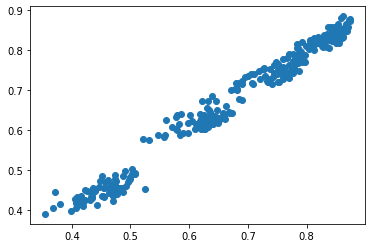

In [9]:

plt.scatter(y_test, y_pred)

In [53]:




my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]



def mse_eval(name_, actual, pred):
    global predictions
    global colors

    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    my_predictions[name_] =rmse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'rmse'])
    print(df)
    min_ = df['rmse'].min() - 10
    max_ = df['rmse'].max() + 10
    

    

# remove model
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True


# coefficients visulization
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()


### 리니어

In [139]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', y_test, linear_pred)


                   model      rmse
0     Ridge(alpha=0.001)  0.021849
1       LinearRegression  0.021848
2      Weighted Blending  0.021431
3              j xgboost  0.020225
4        j GradientBoost  0.019896
5             j Stacking  0.015078
6                 j LGBM  0.013454
7  RandomForest Ensemble  0.008299
8         j RandomForest  0.008244


### 릿지

In [140]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', y_test, ridge_pred)

                   model      rmse
0         Ridge(alpha=1)  0.022853
1     Ridge(alpha=0.001)  0.021849
2       LinearRegression  0.021848
3      Weighted Blending  0.021431
4              j xgboost  0.020225
5        j GradientBoost  0.019896
6             j Stacking  0.015078
7                 j LGBM  0.013454
8  RandomForest Ensemble  0.008299
9         j RandomForest  0.008244


### 라쏘

In [141]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', y_test, lasso_pred)

                    model      rmse
0       Lasso(alpha=0.01)  0.063801
1          Ridge(alpha=1)  0.022853
2      Ridge(alpha=0.001)  0.021849
3        LinearRegression  0.021848
4       Weighted Blending  0.021431
5               j xgboost  0.020225
6         j GradientBoost  0.019896
7              j Stacking  0.015078
8                  j LGBM  0.013454
9   RandomForest Ensemble  0.008299
10         j RandomForest  0.008244


### 엘라스틱넷

In [142]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.2)
elasticnet.fit(X_train, y_train)
elas_pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.2)', y_test, elas_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1          Lasso(alpha=0.01)  0.063801
2             Ridge(alpha=1)  0.022853
3         Ridge(alpha=0.001)  0.021849
4           LinearRegression  0.021848
5          Weighted Blending  0.021431
6                  j xgboost  0.020225
7            j GradientBoost  0.019896
8                 j Stacking  0.015078
9                     j LGBM  0.013454
10     RandomForest Ensemble  0.008299
11            j RandomForest  0.008244


In [227]:
standard_elasticnet = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

elas_scaled = standard_elasticnet.fit(X_train, y_train)
elas_pred = elas_scaled.predict(x_test)
mse_eval('Standard ElasticNet', y_test, elas_scaled_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4               RandomForest  0.023626
5             Ridge(alpha=1)  0.022853
6         Ridge(alpha=0.001)  0.021849
7           LinearRegression  0.021848
8          Weighted Blending  0.021431
9                  j xgboost  0.020225
10                   XGBoost  0.020225
11           j GradientBoost  0.019896
12    GradientBoost Ensemble  0.019896
13                  LightGBM  0.019111
14              xgbStacking   0.018942
15                j Stacking  0.015078
16                    j LGBM  0.013454
17         Stacking Ensemble  0.012781
18             3RandomForest  0.008395
19             2RandomForest  0.008341
20     RandomForest Ensemble  0.008299
21            j RandomForest  0.008244
22             1RandomForest  0.008194
23             aRandomForest  0.008042


In [144]:
poly_elasticnet = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.5, l1_ratio=0.2)
)

poly_pred = poly_elasticnet.fit(X_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', y_test, poly_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4             Ridge(alpha=1)  0.022853
5         Ridge(alpha=0.001)  0.021849
6           LinearRegression  0.021848
7          Weighted Blending  0.021431
8                  j xgboost  0.020225
9            j GradientBoost  0.019896
10                j Stacking  0.015078
11                    j LGBM  0.013454
12     RandomForest Ensemble  0.008299
13            j RandomForest  0.008244


### 보팅

In [ ]:
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet', elasticnet),
    ('standard_elasticnet', standard_elasticnet),
    ('poly_elasticnet', poly_elasticnet)
]

In [64]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [72]:
voting_regressor.fit(X, y)
VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=-1, normalize=False)),
                            
                            ('ridge',
                             Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001)),
                            ('lasso',
                             Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False,
                                  #  interaction_only=False,order='C'
                                   )),
                            
                            ('standardscaler',
                             StandardScaler(copy=True,with_mean=True,
                                            with_std=True)),
                            
                            ('elasticnet',
                             
                             ElasticNet(alpha=0.5, copy_X=True,                                      
                                        fit_intercept=True,
                                        l1_ratio=0.2,
                                        max_iter=1000,
                                        normalize=False,
                                        positive=False,
                                        precompute=False,
                                        random_state=None,
                                        selection='cyclic',
                                        tol=0.0001,
                                        warm_start=False))])
                                                        

                                             



VotingRegressor(estimators=[('linear_reg',
                             LinearRegression(n_jobs=-1, normalize=False)),
                            ('ridge', Ridge(alpha=1, normalize=False)),
                            ('lasso', Lasso(alpha=0.01, normalize=False)),
                            ('standardscaler', StandardScaler()),
                            ('elasticnet',
                             ElasticNet(alpha=0.5, l1_ratio=0.2,
                                        normalize=False))])

In [73]:
voting_pred = voting_regressor.predict(x_test)
mse_eval('Voting Ensemble', y_test, voting_pred)

                      model      rmse
0  ElasticNet(l1_ratio=0.2)  0.150057
1       Standard ElasticNet  0.119721
2           Poly ElasticNet  0.115418
3           Voting Ensemble  0.076935
4         Lasso(alpha=0.01)  0.065002
5            Ridge(alpha=1)  0.023441
6          LinearRegression  0.022114


### 랜덤포레스트

In [222]:

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest', y_test, rfr_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4               RandomForest  0.023626
5             Ridge(alpha=1)  0.022853
6         Ridge(alpha=0.001)  0.021849
7           LinearRegression  0.021848
8          Weighted Blending  0.021431
9                  j xgboost  0.020225
10                   XGBoost  0.020225
11           j GradientBoost  0.019896
12    GradientBoost Ensemble  0.019896
13              xgbStacking   0.015143
14                j Stacking  0.015078
15                    j LGBM  0.013454
16                  LightGBM  0.013454
17         Stacking Ensemble  0.012781
18             3RandomForest  0.008395
19             2RandomForest  0.008341
20     RandomForest Ensemble  0.008299
21            j RandomForest  0.008244
22             1RandomForest  0.008194
23             aRandomForest  0.008042


In [79]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1,
                      min_samples_split=2,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', random_state=1)

                      model      rmse
0  ElasticNet(l1_ratio=0.2)  0.150057
1       Standard ElasticNet  0.119721
2           Poly ElasticNet  0.115418
3           Voting Ensemble  0.076935
4         Lasso(alpha=0.01)  0.065002
5     RandomForest Ensemble  0.023703
6            Ridge(alpha=1)  0.023441
7          LinearRegression  0.022114


In [81]:
rfr_t = RandomForestRegressor(random_state=1, n_estimators=500, max_depth=7, max_features='sqrt')
rfr_t.fit(X, y)
rfr_t_pred = rfr_t.predict(x_test)
mse_eval('RandomForest Ensemble w/ Tuning', y_test, rfr_t_pred)

                             model      rmse
0         ElasticNet(l1_ratio=0.2)  0.150057
1              Standard ElasticNet  0.119721
2                  Poly ElasticNet  0.115418
3                  Voting Ensemble  0.076935
4                Lasso(alpha=0.01)  0.065002
5  RandomForest Ensemble w/ Tuning  0.033351
6            RandomForest Ensemble  0.023703
7                   Ridge(alpha=1)  0.023441
8                 LinearRegression  0.022114


### gbm

In [145]:

gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GradientBoost Ensemble', y_test, gbr_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4             Ridge(alpha=1)  0.022853
5         Ridge(alpha=0.001)  0.021849
6           LinearRegression  0.021848
7          Weighted Blending  0.021431
8                  j xgboost  0.020225
9            j GradientBoost  0.019896
10    GradientBoost Ensemble  0.019896
11                j Stacking  0.015078
12                    j LGBM  0.013454
13     RandomForest Ensemble  0.008299
14            j RandomForest  0.008244


In [97]:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None,
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GradientBoostingRegressor(loss='ls', random_state=1)

                             model      rmse
0         ElasticNet(l1_ratio=0.2)  0.150057
1              Standard ElasticNet  0.119721
2                  Poly ElasticNet  0.115418
3                  Voting Ensemble  0.076935
4                Lasso(alpha=0.01)  0.065002
5  RandomForest Ensemble w/ Tuning  0.033351
6            RandomForest Ensemble  0.023703
7                   Ridge(alpha=1)  0.023441
8           GradientBoost Ensemble  0.022451
9                 LinearRegression  0.022114


In [99]:
gbr_t = GradientBoostingRegressor(random_state=1, learning_rate=0.01)
gbr_t.fit(X_train, y_train)
gbr_t_pred = gbr_t.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01)', y_test, gbr_t_pred)

                                         model      rmse
0                     ElasticNet(l1_ratio=0.2)  0.150057
1                          Standard ElasticNet  0.119721
2                              Poly ElasticNet  0.115418
3                              Voting Ensemble  0.076935
4                            Lasso(alpha=0.01)  0.065002
5   GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6              RandomForest Ensemble w/ Tuning  0.033351
7                        RandomForest Ensemble  0.023703
8                               Ridge(alpha=1)  0.023441
9                       GradientBoost Ensemble  0.022451
10                            LinearRegression  0.022114


In [100]:
gbr_t2 = GradientBoostingRegressor(random_state=1, learning_rate=0.01, n_estimators=1000)
gbr_t2.fit(X_train, y_train)
gbr_t2_pred = gbr_t2.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000)', y_test, gbr_t2_pred)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                               RandomForest Ensemble  0.023703
8                                      Ridge(alpha=1)  0.023441
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
10                             GradientBoost Ensemble  0.022451
11                                   LinearRegression  0.022114


In [101]:
gbr_t3 = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000, subsample=0.7)
gbr_t3.fit(X_train, y_train)
gbr_t3_pred = gbr_t3.predict(x_test)
mse_eval('GradientBoost Ensemble w/ tuning (lr=0.01, est=1000, subsample=0.7)', y_test, gbr_t3_pred)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                               RandomForest Ensemble  0.023703
8                                      Ridge(alpha=1)  0.023441
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
10                             GradientBoost Ensemble  0.022451
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
12                                   LinearRegression  0.022114


### xgboost

In [103]:

xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)

[14:50:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

In [105]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

XGBRegressor(gpu_id=-1, interaction_constraints='', learning_rate=0.300000012,
             max_depth=6, monotone_constraints='()', n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

[18:13:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4             Ridge(alpha=1)  0.022853
5         Ridge(alpha=0.001)  0.021849
6           LinearRegression  0.021848
7          Weighted Blending  0.021431
8                  j xgboost  0.020225
9                    XGBoost  0.020225
10           j GradientBoost  0.019896
11    GradientBoost Ensemble  0.019896
12                j Stacking  0.015078
13                    j LGBM  0.013454
14     RandomForest Ensemble  0.008299
15            j RandomForest  0.008244


In [107]:
xgb_t = XGBRegressor(random_state=1, learning_rate=0.01, n_estimators=1000, subsample=0.7, max_features=0.8, max_depth=7)
xgb_t.fit(X_train, y_train)
xgb_t_pred = xgb_t.predict(x_test)
mse_eval('XGBoost w/ Tuning', y_test, xgb_t_pred)

[14:51:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                               RandomForest Ensemble  0.023703
8                                      Ridge(alpha=1)  0.023441
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
10                             GradientBoost Ensemble  0.022451
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
12                                       

### lgbm

In [224]:
lgbm = LGBMRegressor(random_state=1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LightGBM', y_test, lgbm_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4               RandomForest  0.023626
5             Ridge(alpha=1)  0.022853
6         Ridge(alpha=0.001)  0.021849
7           LinearRegression  0.021848
8          Weighted Blending  0.021431
9                  j xgboost  0.020225
10                   XGBoost  0.020225
11           j GradientBoost  0.019896
12    GradientBoost Ensemble  0.019896
13                  LightGBM  0.019111
14              xgbStacking   0.015143
15                j Stacking  0.015078
16                    j LGBM  0.013454
17         Stacking Ensemble  0.012781
18             3RandomForest  0.008395
19             2RandomForest  0.008341
20     RandomForest Ensemble  0.008299
21            j RandomForest  0.008244
22             1RandomForest  0.008194
23             aRandomForest  0.008042


In [110]:
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBMRegressor(random_state=1)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                               RandomForest Ensemble  0.023703
8                                      Ridge(alpha=1)  0.023441
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
10                             GradientBoost Ensemble  0.022451
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
12                                            XGBoost  0.022335
13                                   LinearRegression  0.022114
14                                  XGBo

In [112]:
# with hyper-parameter tuning
lgbm_t = LGBMRegressor(random_state=1, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.9, subsample=0.7, max_depth=5)
lgbm_t.fit(X_train, y_train)
lgbm_t_pred = lgbm_t.predict(x_test)
mse_eval('LightGBM w/ Tuning', y_test, lgbm_t_pred)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                               RandomForest Ensemble  0.023703
8                                      Ridge(alpha=1)  0.023441
9   GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
10                             GradientBoost Ensemble  0.022451
11  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
12                                            XGBoost  0.022335
13                                   LinearRegression  0.022114
14                                  XGBo

### 스태킹

In [225]:
stack_models = [
    ('randomforest', rfr),
    ('lgbm', lgbm)
]

In [226]:

stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('xgbStacking ', y_test, stack_pred)

[19:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4               RandomForest  0.023626
5             Ridge(alpha=1)  0.022853
6         Ridge(alpha=0.001)  0.021849
7           LinearRegression  0.021848
8          Weighted Blending  0.021431
9                  j xgboost  0.020225
10                   XGBoost  0.020225
11           j GradientBoost  0.019896
12    GradientBoost Ensemble  0.019896
13                  LightGBM  0.019111
14              xgbStacking   0.018942
15                j Stacking  0.015078
16                    j LGBM  0.013454
17         Stacking Ensemble  0.012781
18             3RandomForest  0.008395
19             2RandomForest  0.008341
20     RandomForest Ensemble  0.008299
21            j

### 블렌드

In [32]:
final_outputs = {
    'randomforest': rfr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred
}

In [56]:
final_prediction=\
final_outputs['randomforest'] * 0.5\
+final_outputs['xgb'] * 0.3\
+final_outputs['lgbm'] * 0.2\

In [57]:
mse_eval('Weighted Blending', y_test, final_prediction)

               model      rmse
0  Weighted Blending  0.021431


### gridsearchcv

In [123]:
params = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 2000, 3000],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0],
}

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:

rcv_lgbm = RandomizedSearchCV(LGBMRegressor(), params, random_state=1, cv=5, n_iter=100, scoring='neg_mean_squared_error')

In [127]:
rcv_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [500, 1000, 2000, 3000],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1, scoring='neg_mean_squared_error')

In [131]:
rcv_lgbm.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 3000,
 'subsample': 0.8}

In [132]:
lgbm_best = LGBMRegressor(learning_rate=0.05, n_estimators=3000, subsample=0.8, max_depth=3, colsample_bytree=1.0)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', y_test, lgbm_best_pred)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                                   Weighted Blending  0.023823
8                               RandomForest Ensemble  0.023703
9                                      Ridge(alpha=1)  0.023441
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
11                             GradientBoost Ensemble  0.022451
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
13                                            XGBoost  0.022335
14                                   Lin

In [133]:
params = {
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [800, 1000, 1200],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.8, 0.85, 0.9],
    'subsample': [0.8, 0.85, 0.9],
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LGBMRegressor(), params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [134]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [137]:
GridSearchCV(cv=5,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85,],
                         'learning_rate': [0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [1000, 1200],
                         'subsample': [0.8, 0.85, ]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.85, 0.9],
                         'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [800, 1000, 1200],
                         'subsample': [0.8, 0.85, 0.9]},
             scoring='neg_mean_squared_error')

In [138]:
grid_search.best_params_

{'colsample_bytree': 0.85,
 'learning_rate': 0.06,
 'max_depth': 4,
 'n_estimators': 1200,
 'subsample': 0.8}

In [139]:
lgbm_best = LGBMRegressor(learning_rate=0.06, n_estimators=1200, subsample=0.8, max_depth=4, colsample_bytree=0.85)
lgbm_best_pred = lgbm_best.fit(X_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', y_test, lgbm_best_pred)

                                                model      rmse
0                            ElasticNet(l1_ratio=0.2)  0.150057
1                                 Standard ElasticNet  0.119721
2                                     Poly ElasticNet  0.115418
3                                     Voting Ensemble  0.076935
4                                   Lasso(alpha=0.01)  0.065002
5          GradientBoost Ensemble w/ tuning (lr=0.01)  0.060996
6                     RandomForest Ensemble w/ Tuning  0.033351
7                                   Weighted Blending  0.023823
8                               RandomForest Ensemble  0.023703
9                                      Ridge(alpha=1)  0.023441
10  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022791
11                             GradientBoost Ensemble  0.022451
12  GradientBoost Ensemble w/ tuning (lr=0.01, est...  0.022388
13                                            XGBoost  0.022335
14                                   Lin

#### 랜덤포레스트 grid

In [159]:
param_grid = {
    
    "n_estimators" : [10,50,100,500,1000],
    "max_features" : ["auto", "log2", "sqrt"],
    "bootstrap"    : [True, False], 
    'max_features': [2, 4, 6, 8]
}

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [161]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100}

In [228]:
rfr = RandomForestRegressor(**grid_search.best_params_,random_state=11)

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('aRandomForest', y_test, rfr_pred)

                       model      rmse
0   ElasticNet(l1_ratio=0.2)  0.149555
1        Standard ElasticNet  0.119401
2            Poly ElasticNet  0.115079
3          Lasso(alpha=0.01)  0.063801
4              aRandomForest  0.023929
5               RandomForest  0.023626
6             Ridge(alpha=1)  0.022853
7         Ridge(alpha=0.001)  0.021849
8           LinearRegression  0.021848
9          Weighted Blending  0.021431
10                 j xgboost  0.020225
11                   XGBoost  0.020225
12           j GradientBoost  0.019896
13    GradientBoost Ensemble  0.019896
14                  LightGBM  0.019111
15              xgbStacking   0.018942
16                j Stacking  0.015078
17                    j LGBM  0.013454
18         Stacking Ensemble  0.012781
19             3RandomForest  0.008395
20             2RandomForest  0.008341
21     RandomForest Ensemble  0.008299
22            j RandomForest  0.008244
23             1RandomForest  0.008194


### 결과

In [126]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', y_test, linear_pred)


               model      rmse
0   LinearRegression  0.021848
1  Weighted Blending  0.021431
2         j Stacking  0.018604


In [129]:
lgbm = LGBMRegressor()
lgbm = lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('j LGBM', y_test, lgbm_pred)

               model      rmse
0   LinearRegression  0.021848
1  Weighted Blending  0.021431
2         j Stacking  0.018604
3             j LGBM  0.013454


In [130]:
xgb = XGBRegressor(random_state=1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('j xgboost', y_test, xgb_pred)

[18:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
               model      rmse
0   LinearRegression  0.021848
1  Weighted Blending  0.021431
2          j xgboost  0.020225
3         j Stacking  0.018604
4             j LGBM  0.013454


In [131]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('j. RandomForest', y_test, rfr_pred)

               model      rmse
0   LinearRegression  0.021848
1  Weighted Blending  0.021431
2          j xgboost  0.020225
3         j Stacking  0.018604
4             j LGBM  0.013454
5     j RandomForest  0.008244


In [132]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('j GradientBoost', y_test, gbr_pred)

               model      rmse
0   LinearRegression  0.021848
1  Weighted Blending  0.021431
2          j xgboost  0.020225
3    j GradientBoost  0.019896
4         j Stacking  0.018604
5             j LGBM  0.013454
6     j RandomForest  0.008244


In [133]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=0.001)', y_test, ridge_pred)

                model      rmse
0  Ridge(alpha=0.001)  0.021849
1    LinearRegression  0.021848
2   Weighted Blending  0.021431
3           j xgboost  0.020225
4     j GradientBoost  0.019896
5          j Stacking  0.018604
6              j LGBM  0.013454
7      j RandomForest  0.008244


#### 스태킹결과


In [134]:
stack_models = [
    ('gbr', gbr),
    ('randomforest', rfr),
    ('lgbm', lgbm),
    ('ridge', ridge),
    ('linear', linear_reg),
    ('xgb', xgb),
]

In [135]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('j Stacking', y_test, stack_pred)

[18:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                model      rmse
0  Ridge(alpha=0.001)  0.021849
1    LinearRegression  0.021848
2   Weighted Blending  0.021431
3           j xgboost  0.020225
4     j GradientBoost  0.019896
5          j Stacking  0.015078
6              j LGBM  0.013454
7      j RandomForest  0.008244


#### 블렌드 결과

In [118]:

final_outputs = {
    'randomforest': rfr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'ridge': ridge_pred,
    'linear': linear_pred,
    'gbr': gbr_pred,
    'stack': stack_pred,
}


In [124]:
final_prediction=\
final_outputs['randomforest'] * 0.05\
+final_outputs['gbr'] * 0.05\
+final_outputs['linear'] * 0.05\
+final_outputs['xgb'] * 0.05\
+final_outputs['ridge'] * 0.05\
+final_outputs['lgbm'] * 0.05\
+final_outputs['stack'] * 0.7\

mse_eval('Weighted Blending', final_prediction, y_test)

ValueError: ignored

In [125]:
def blended_predictions(X):
    return (
            (0.05 * ridge.predict(X)) + \
            (0.05 * gbr.predict(X)) + \
            (0.05 * xgb.predict(X)) + \
            (0.05 * lgbm.predict(X)) + \
            (0.05 * linear_reg.predict(X)) + \
            (0.7 * stack_reg.predict(X)) + \
            (0.05 * rfr.predict(X)))
    
    # (0.5 * stack_model.predict(np.array(X))

In [117]:
pred = blended_predictions(tdf)

test['target'] = pred
test.to_csv('정현우8.csv')

### 세이브

In [206]:
test['target'] = pd.DataFrame(rfr.predict(tdf))

test.to_csv('정현우9.csv')
